In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Microsoft Sans Serif"
matplotlib.rcParams['font.family'] = "sans-serif"

In [3]:
plt.style.use('seaborn-colorblind')
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig_size = (8,6)
font_size = 15

def spine():
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)

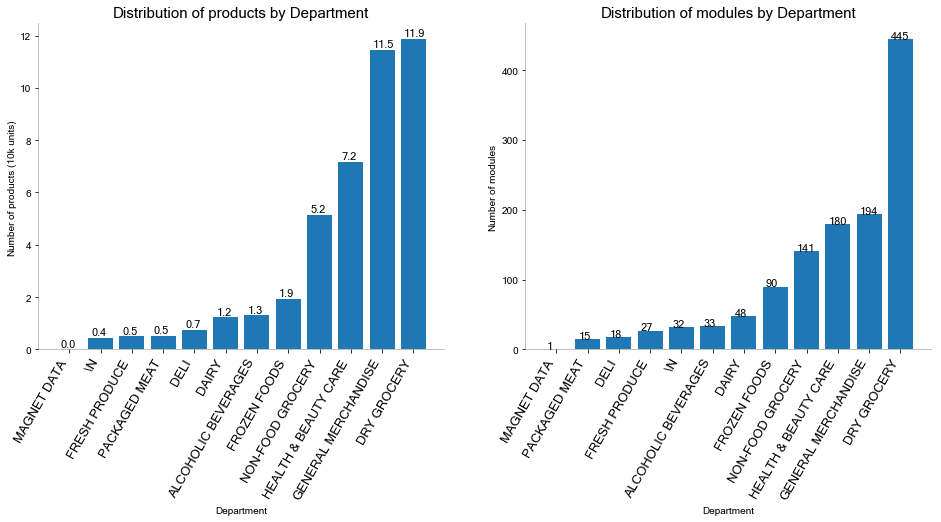

In [5]:
# a
a4_module = pd.read_csv('a.4.ii.prodct_by_department.csv', 
                        header=None, sep="\t", names=['department', 'product']).sort_values('product')
a4_module['product'] = a4_module['product'] / 1e5
plt.subplots(figsize=(16, 6))
plt.subplot(121)
plt.bar(a4_module['department'], a4_module['product'], color='tab:blue')
for i in range(len(a4_module)):
    plt.annotate('%s'%round(a4_module['product'].values[i], 1), xy=(i-0.3, a4_module['product'].values[i]+0.1), fontsize=11)
plt.xticks([i for i in range(len(a4_module))], a4_module['department'], rotation=60, size=13, horizontalalignment='right')
plt.title('Distribution of products by Department', fontsize=font_size)
plt.ylabel("Number of products (10k units)")
plt.xlabel("Department")
spine()

a4_department = pd.read_csv('a.4.ii.module_by_department.csv', 
                            header=None, sep="\t", names=['department', 'module']).sort_values('module')
plt.subplot(122)
plt.bar(a4_department['department'], a4_department['module'], color='tab:blue')
for i in range(len(a4_department)):
    plt.annotate('%s'%round(a4_department['module'].values[i], 1), xy=(i-0.3, a4_department['module'].values[i]+0.1), fontsize=11)
plt.xticks([i for i in range(len(a4_department))], a4_department['department'], rotation=60, size=13, horizontalalignment='right')
plt.title('Distribution of modules by Department', fontsize=font_size)
plt.ylabel("Number of modules")
plt.xlabel("Department")
spine()

plt.show()

In [91]:
b2 = pd.read_csv("b.2.loyalism_details.csv")
income_dict = {
    3: 'Under \$5k', 4: '\$5k-\$7.9k', 6: '\$8k-\$9.9k', 8: '\$10k-\$11.9k', 10:'\$12k-\$14.9k',
    11: '\$15k-\$19.9k', 13: '\$20k-\$24.9k', 15: '\$25k-\$29.9k', 16: '\$30k-\$34.9k', 17: '\$35k-\$39.9k',
    18: '\$40k-\$44.9k', 19: '\$45k-\$49.9k', 21: '\$50k-\$59.9k', 23: '\$60k-\$69.9k', 26: '\$70k-\$99.9k', 27: '\$100.0k or more'}
size_dict = {
    1: 'Single members', 2: 'Two members', 3: 'Three members', 4: 'Four members', 5: 'Five members',
    6: 'Six members', 7: 'Seven members', 8: 'Eight members', 9: 'Nine members or more'}
residence_type_dict = {
    1: 'One family house', 2: 'One family house – condo', 3: 'Two family house', 4: 'Two family house ‐ condo', 
    5: 'Three family house', 6: 'Three family house –condo', 7: 'Trailer', 8: 'Not reported'}

b2['hh_race'] = b2['hh_race'].apply(lambda x: {1:'White Caucasian', 2:'African American', 3:'Asian', 4:'Unknown'}[x])
b2['hh_is_latinx'] = b2['hh_is_latinx'].apply(lambda x: {1:'Latinx', 2:'Non-Latinx'}[x])
b2['hh_income'] = b2['hh_income'].apply(lambda x: income_dict[x])
b2['hh_size'] = b2['hh_size'].apply(lambda x: size_dict[x])
b2['hh_residence_type'] = b2['hh_residence_type'].apply(lambda x: residence_type_dict[x])
b2.columns = ['hh_id', 'hh_race', 'hh_latinx', 'hh_income', 'hh_size', 'hh_zip_code', 'hh_state', 'hh_residence type']

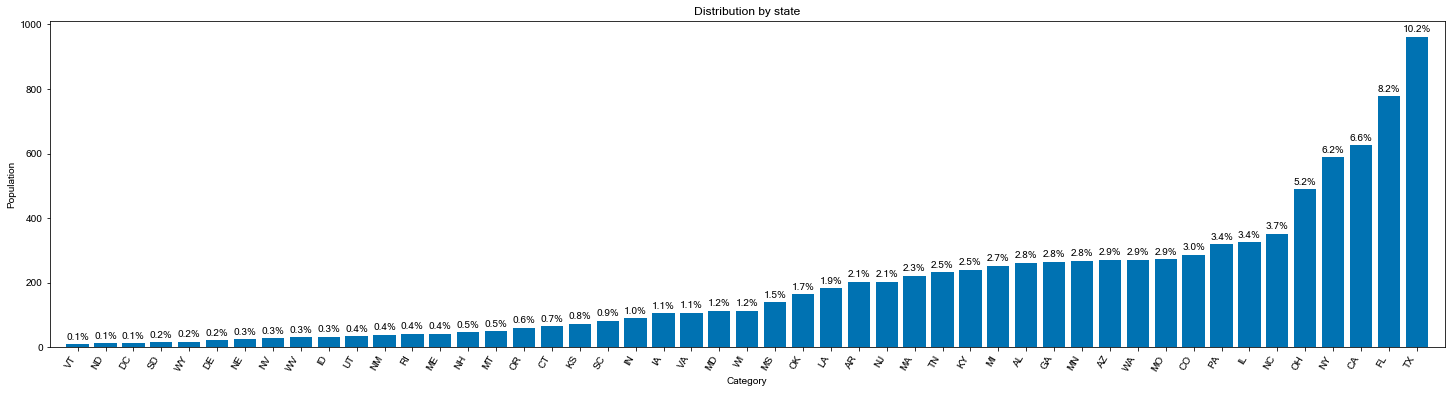

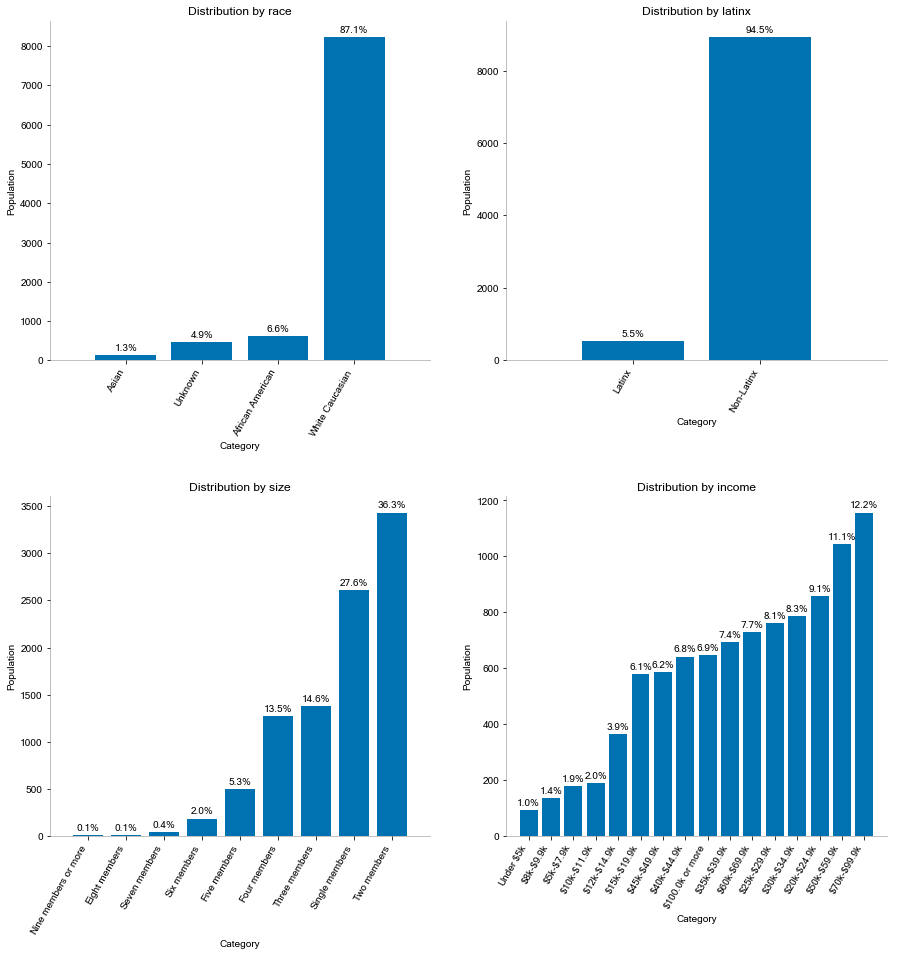

In [134]:
plt.subplots(figsize=(25, 6))
col = 'hh_state'
count = b2[[col]].groupby(col).apply(lambda x: len(x)).sort_values()
plt.bar([i for i in range(len(count.index))], count.values)
plt.xlim(-1, len(count.index))
for i, n in enumerate(count.index):
    plt.annotate('%s%%'%round(100*count[n]/count.sum(), 1), xy=(i, count[n]+count.max()/70), horizontalalignment='center')
plt.xticks([i for i in range(len(count.index))], count.index, rotation = 60, horizontalalignment='right')
plt.title('Distribution by state')
plt.ylabel("Population")
plt.xlabel("Category")
plt.show()

plt.subplots(figsize=(15,15))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
for i in range(4):
    plt.subplot(2,2,i+1)
    col = 'hh_%s'%['race', 'latinx', 'size', 'income'][i]
    count = b2[[col]].groupby(col).apply(lambda x: len(x)).sort_values()
    plt.bar([i for i in range(len(count.index))], count.values)
    plt.xlim(-1, len(count.index))
    for j, n in enumerate(count.index):
        plt.annotate('%s%%'%round(100*count[n]/count.sum(), 1), xy=(j, count[n]+count.max()/70), horizontalalignment='center')
    plt.xticks([i for i in range(len(count.index))], count.index, rotation = 60, horizontalalignment='right')
    plt.title('Distribution by %s'%['race', 'latinx', 'size', 'income'][i])
    plt.ylabel("Population")
    plt.xlabel("Category")
    spine()
plt.show()

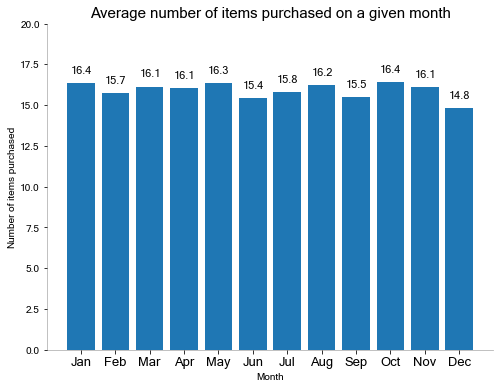

In [122]:
b3_item = pd.read_csv("b.3.i.avg_num_item_purchased.csv", header=None, sep="\t", names=['month', 'avg_item'])
b3_trip = pd.read_csv("b.3.ii.avg_num_shopping.csv", header=None, sep="\t", names=['month', 'avg_trip'])
b3_day = pd.read_csv("b.3.iii.avg_days_between_shopping.csv", header=None, sep="\t", names=['month', 'avg_day'])
fig, ax = plt.subplots(figsize=fig_size)
plt.ylim(0, 20)
ax.bar(b3_item['month'], b3_item['avg_item'], color='tab:blue')
for i in b3_item['month']:
    ax.annotate('%s'%round(b3_item['avg_item'].values[i-1], 1), xy=(i-0.3, b3_item['avg_item'].values[i-1]+0.6), fontsize=11)
plt.xticks(b3_item['month'], month_list, size=13)
plt.title('Average number of items purchased on a given month', fontsize=font_size)
plt.ylabel("Number of items purchased")
plt.xlabel("Month")
spine()
plt.show()

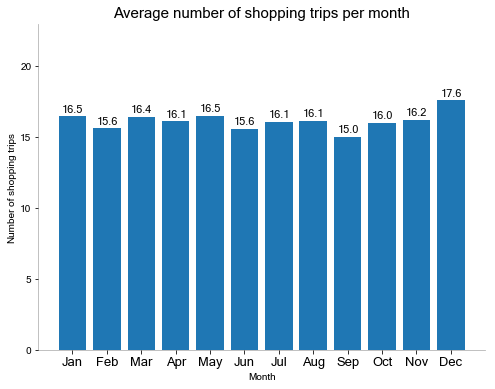

In [124]:
# plot the distribution
fig, ax = plt.subplots(figsize=fig_size)
ax.bar(b3_trip['month'], b3_trip['avg_trip'], color='tab:blue')
plt.ylim(0, 23)
for i in b3_item['month']:
    ax.annotate('%s'%round(b3_trip['avg_trip'].values[i-1], 1), xy=(i-0.3, b3_trip['avg_trip'].values[i-1]+0.3), fontsize=11)
plt.xticks(b3_trip['month'], month_list, size=13)
plt.title('Average number of shopping trips per month', fontsize=font_size)
plt.ylabel("Number of shopping trips")
plt.xlabel("Month")
spine()
plt.show()

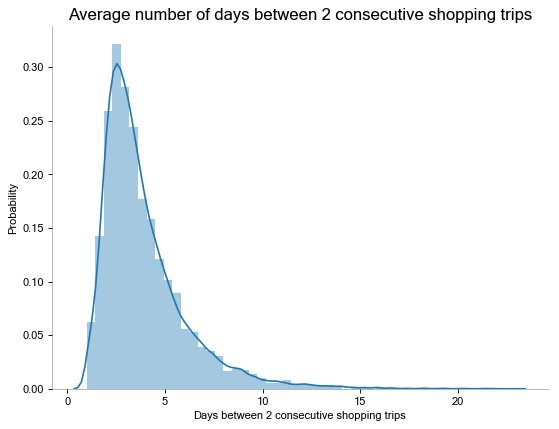

In [132]:
plt.figure(figsize=fig_size, dpi= 80)
sns.distplot(b3_day['avg_day'], bins=50, color='tab:blue')
plt.title('Average number of days between 2 consecutive shopping trips', fontsize=font_size)
plt.xlabel("Days between 2 consecutive shopping trips")
plt.ylabel("Probability")
spine()
plt.show()

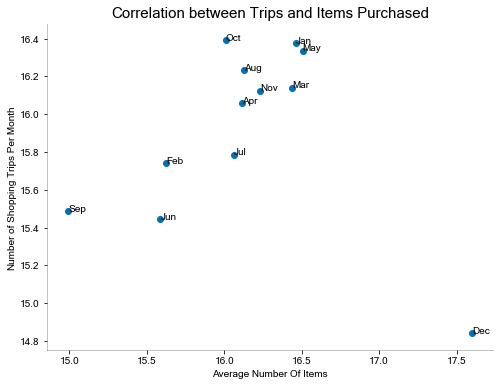

In [128]:
Item = pd.read_csv("b.3.i.avg_num_item_purchased.csv", header=None, sep="\t", names=['month', 'avg_item'])
Trip = pd.read_csv("b.3.ii.avg_num_shopping.csv", header=None, sep="\t", names=['month', 'avg_trip'])
plt.figure(figsize=fig_size)
#plt.xlim(-0.5, 12.5)
plt.scatter(Trip['avg_trip'], Item['avg_item'])
text = [plt.text(Trip['avg_trip'][i], Item['avg_item'][i], '%s'%month_list[i]) for i in range(12)]
plt.xlabel('Average Number Of Items')
plt.ylabel('Number of Shopping Trips Per Month')
plt.title('Correlation between Trips and Items Purchased', fontsize=font_size)
spine()
plt.show()

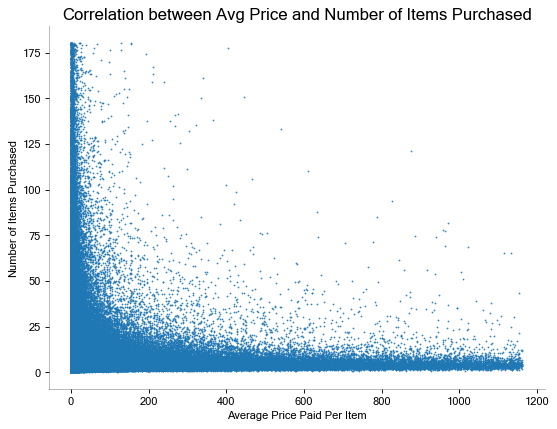

In [130]:
# Import Data
df = pd.read_csv("c.2.corr_avgprice_num.csv", header=None, sep="\t", names=['AvgPrice', 'NumItem'])
df = df[(np.abs(stats.zscore(df['NumItem'])) < 3)]
df = df[(np.abs(stats.zscore(df['AvgPrice'])) < 3)]
AvgPrice = df['AvgPrice']
NumItem  = df['NumItem']
plt.figure(figsize=fig_size, dpi=80)
plt.scatter(NumItem, AvgPrice, s=0.3, c='tab:blue')
plt.xlabel('Average Price Paid Per Item')
plt.ylabel('Number of Items Purchased')
plt.title('Correlation between Avg Price and Number of Items Purchased', fontsize=font_size)
spine()
plt.show()

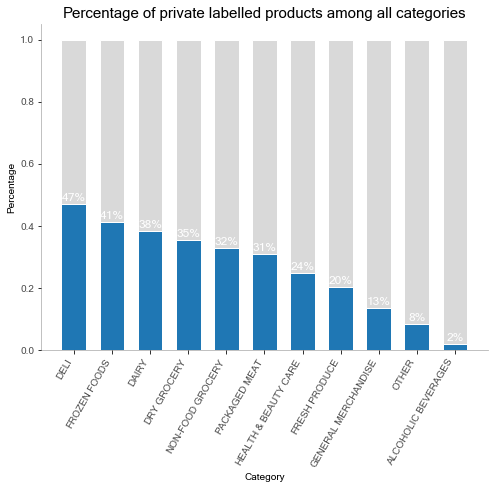

In [4]:
font_size = 15
csfont = {'fontname':'Avenir'}
# libraries
# Create dataset & From raw value to percentage
r = [0,1,2,3,4,5,6,7,8,9,10]
greenBars = np.array([421425,154744,178532,169298,79701,2781,47133,35173,15851,10250,3623])
orangeBars = np.array([766608,990681,537630,346356,112958,127881,76010,39562,35129,40099,39821])
totals = greenBars + orangeBars
greenBars = (greenBars / totals)
orangeBars = (orangeBars / totals)
name_list = ['DRY GROCERY','GENERAL MERCHANDISE','HEALTH & BEAUTY CARE','NON-FOOD GROCERY','FROZEN FOODS',
             'ALCOHOLIC BEVERAGES','DAIRY','DELI','PACKAGED MEAT','FRESH PRODUCE','OTHER']
df = pd.DataFrame({'CTL':greenBars, 'Total': orangeBars, 'names': name_list})
df = df.sort_values('CTL', ascending=False)

plt.figure(figsize=fig_size)
 
# plot
barWidth = 0.65
# Create green Bars
plt.bar(name_list, df['CTL'], edgecolor='white', width=barWidth, color = 'tab:blue', )
# Create orange Bars
plt.bar(name_list, df['Total'], bottom=df['CTL'], edgecolor='white', width=barWidth, color = '#d9d9d9')

for i in r:
    plt.annotate('%s%%'%int(df['CTL'].values[i]*100), xy=(i, df['CTL'].values[i]+0.01),
                 horizontalalignment='center', fontsize=12, color = 'w')

# Custom x axis
plt.xticks(name_list, df['names'], rotation=60, horizontalalignment='right', alpha=.7)
plt.yticks(alpha=.7)
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.title("Percentage of private labelled products among all categories", fontsize=font_size)

plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)

plt.show()

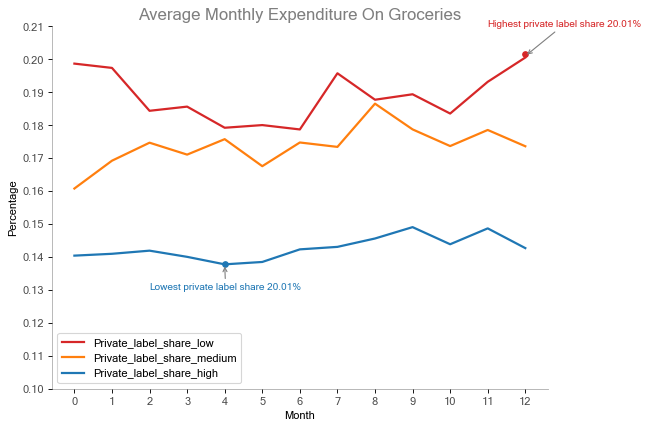

In [110]:
df_temp = pd.read_csv('c.3.ii.expenditure_share_monthly_by_income.csv', sep='\t', header=None)
df_temp.columns = ['Month', 'label', 'share']
list_df = [None] * 3
list_name = ['Private_label_share_low', 'Private_label_share_medium', 'Private_label_share_high']
for i in range(3):
    list_df[i] = df_temp[['Month', 'share']][df_temp['label']==i+1].sort_values('Month')
    list_df[i] = list_df[i].reset_index(drop=True)
    list_df[i].columns = ['Month', list_name[i]]
    
plt.figure(figsize=fig_size, dpi=80)
plt.plot('Month', 'Private_label_share_low', data=list_df[0], markersize=12, color='tab:red', linewidth=2)
plt.plot(12, 0.2015, markersize=5, color='tab:red', marker = 'o',linewidth=2)
plt.plot('Month', 'Private_label_share_medium', data=list_df[1], markersize=12, color='tab:orange', linewidth=2)
plt.plot('Month', 'Private_label_share_high', data=list_df[2], markersize=12, color='tab:blue', linewidth=2)
plt.plot(4, 0.1379, markersize=5, color='tab:blue', marker = 'o',linewidth=2)

plt.yticks(ticks = (np.arange(0.1, 0.22, step = 0.01)), rotation=0, alpha=.7)
plt.xticks(ticks = (np.arange(0, 13)), rotation=0, horizontalalignment='center', alpha=.7)
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Average Monthly Expenditure On Groceries', color = 'tab:gray', fontsize = font_size)
plt.annotate('Highest private label share 20.01%', xy=(12, 0.201), xytext=(11, 0.21), color = 'tab:red',
             fontsize=9, arrowprops={'arrowstyle':'->', 'color':'tab:gray'})
plt.annotate('Lowest private label share 20.01%', xy=(4, 0.1378), xytext=(2, 0.13), color = 'tab:blue',
             fontsize=9, arrowprops={'arrowstyle':'->', 'color':'tab:gray'})
plt.legend()
spine()
plt.show()

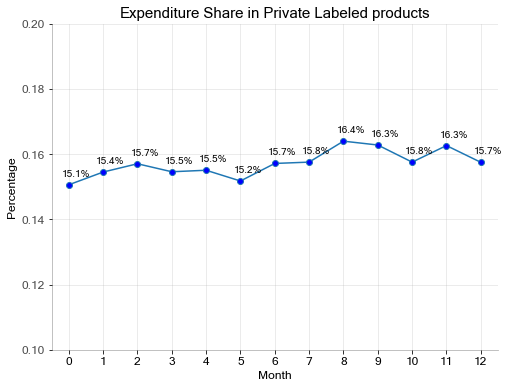

In [59]:
# Import Data
df = pd.read_csv('c.3.ii.expenditure_share_monthly.csv', sep='\t', header=None, index_col=0)
df.index = ['2004-%s'%str(100+i)[1:] for i in df.index[:-1]] + ['2003-12']
df.columns = ['Percentage']
df = df.sort_index()
# Draw Plot
plt.figure(figsize=fig_size)
plt.plot([i for i in range(len(df))], df['Percentage'], marker = 'o', markerfacecolor='b',color='tab:blue')

## Decoration
plt.ylim(0.1, 0.2)
plt.xlim(-0.5, 12.5)
plt.xticks(ticks = (np.arange(0,13)), label = 'Month', rotation=0, fontsize=12, horizontalalignment='center')
plt.yticks(fontsize=12, alpha=.7)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Expenditure Share in Private Labeled products", fontsize=font_size)
#
plt.grid(axis='both', alpha=.3)
#
## Annotate Text
text = [plt.text(i-0.2, 0.002+Percentage, '%s%%'%round(100*Percentage,1), verticalalignment='bottom') 
        for i, Percentage in enumerate(df.Percentage)]
spine()
plt.show()